In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
def print_evaluate(true, predicted):  
    
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def run_all_regressions(X_train, X_test, Y_train, Y_test, regs):

    for name, model in regs.items():

        model.fit(X_train, Y_train)
        
        print(f'\n-----{name}------')
        print('[Train] -------------')
        print_evaluate(Y_train, model.predict(X_train))

        print('[Test] --------------')
        print_evaluate(Y_test, model.predict(X_test))

In [3]:
data = pd.read_csv('tmp/labeling_features.csv')

In [4]:
data.head()

,bbox_area,solidity,equivalent_diameter,orientation,convex_area,area,extent,eccentricity,major_axis_length,feret_diameter_max,perimeter,minor_axis_length,label,target
0,9855,0.775386,83.492434,0.339413,7061,5475,0.555556,0.902083,135.147630,146.931957,392.149278,58.324599,27,1780
1,18081,0.918288,107.124731,-0.663402,9815,9013,0.498479,0.879804,162.473830,171.679935,441.730014,77.229835,21,2126
2,6300,0.812136,69.200101,0.074987,4631,3761,0.596984,0.826929,94.766761,101.271911,294.308658,53.288002,18,1515
3,14592,0.919951,92.836192,-0.754742,7358,6769,0.463884,0.916614,152.469823,162.742127,394.759451,60.953391,24,1172
4,9483,0.766846,78.566312,-1.002721,6322,4848,0.511231,0.733222,102.017098,122.449990,357.462987,69.370589,19,1280


In [5]:
data.target.sum() / 1000

40.028

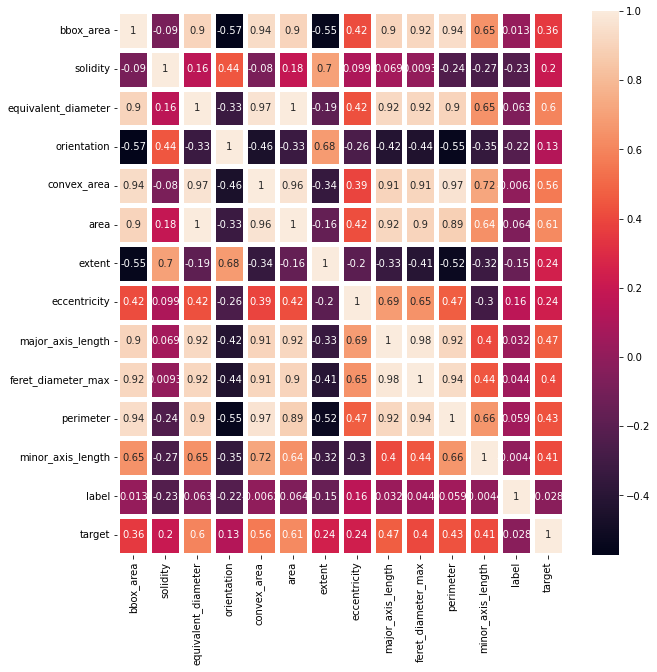

In [6]:
corrmat = data.corr()

_, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corrmat, linewidths=5, annot=True);

In [22]:
corrmat[corrmat.target <= -0.3].target

Series([], Name: target, dtype: float64)

In [8]:
corrmat[corrmat.target >= 0.3].target

bbox_area              0.355131
equivalent_diameter    0.597635
convex_area            0.559276
area                   0.614031
major_axis_length      0.471827
feret_diameter_max     0.404394
perimeter              0.432770
minor_axis_length      0.408990
target                 1.000000
Name: target, dtype: float64

In [9]:
features_names = list(dict(corrmat[corrmat.target >= 0.3].target).keys())

In [10]:
X = data[features_names].drop(labels=['target'], axis=1)
y = data.target
l = data.label

In [11]:
X.head()

,bbox_area,equivalent_diameter,convex_area,area,major_axis_length,feret_diameter_max,perimeter,minor_axis_length
0,9855,83.492434,7061,5475,135.147630,146.931957,392.149278,58.324599
1,18081,107.124731,9815,9013,162.473830,171.679935,441.730014,77.229835
2,6300,69.200101,4631,3761,94.766761,101.271911,294.308658,53.288002
3,14592,92.836192,7358,6769,152.469823,162.742127,394.759451,60.953391
4,9483,78.566312,6322,4848,102.017098,122.449990,357.462987,69.370589


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X.values, 
                                                    y.values, 
                                                    test_size=0.2,
                                                    random_state=0)

In [13]:
scaler = StandardScaler()

In [14]:
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [15]:
run_all_regressions(scaled_x_train, 
                    scaled_x_test,
                    y_train,
                    y_test,
                    regs = {
                        "Lasso": Lasso(), 
                        "LinearRegression": LinearRegression(),
                    })


-----Lasso------
[Train] -------------
MAE: 161.54250019053563
MSE: 33748.49279470079
RMSE: 183.70762856969438
R2 Square 0.6916255013735313
[Test] --------------
MAE: 179.39607050305295
MSE: 51480.54656447763
RMSE: 226.89324927039505
R2 Square 0.5881403392535721

-----LinearRegression------
[Train] -------------
MAE: 155.50852129860323
MSE: 32396.063475593874
RMSE: 179.98906487782494
R2 Square 0.7039832299317921
[Test] --------------
MAE: 193.33116053963423
MSE: 56967.49915002938
RMSE: 238.67865248075577
R2 Square 0.5442430891032325


In [16]:
run_all_regressions(scaled_x_train, 
                    scaled_x_test,
                    y_train,
                    y_test,
                    regs = {
                        "Ridge": Ridge(),
                        "BayesianRidge": BayesianRidge(), 
                        "ElasticNet": ElasticNet(), 
                        "SGDRegressor": SGDRegressor()
                    })


-----Ridge------
[Train] -------------
MAE: 191.15104623693364
MSE: 45809.88319875141
RMSE: 214.03243492225988
R2 Square 0.5814153879556296
[Test] --------------
MAE: 150.4275163464723
MSE: 41694.05319677189
RMSE: 204.19121723710816
R2 Square 0.6664351925001706

-----BayesianRidge------
[Train] -------------
MAE: 196.8699017174109
MSE: 50825.747945935254
RMSE: 225.4456651744168
R2 Square 0.5355832737335132
[Test] --------------
MAE: 167.07486484906818
MSE: 46179.97563661449
RMSE: 214.8952666687065
R2 Square 0.6305464807924511

-----ElasticNet------
[Train] -------------
MAE: 205.17336263681636
MSE: 68656.66718367225
RMSE: 262.0241728995099
R2 Square 0.3726544930784673
[Test] --------------
MAE: 210.60802333143823
MSE: 66830.10478952134
RMSE: 258.5151925700332
R2 Square 0.465339315079205

-----SGDRegressor------
[Train] -------------
MAE: 189.02856061982556
MSE: 42335.023074376004
RMSE: 205.75476440261596
R2 Square 0.6131666799368712
[Test] --------------
MAE: 133.8839505935171
MSE: 35

In [17]:
model = SGDRegressor().fit(scaled_x_train, y_train)
preds = model.predict(scaled_x_test)

In [18]:
pd.DataFrame({
    'predicted': preds,
    'true_value': y_test
})

,predicted,true_value
0,1825.990932,1871
1,1473.150700,1515
2,1433.808633,1275
3,1788.674103,2175
4,1230.158093,1268


In [19]:
model = SGDRegressor()
scaled_x = scaler.fit_transform(X)
scores = cross_val_score(model, scaled_x, y, cv=5, scoring='r2')

In [20]:
scores

array([ 0.56344618, -1.81095856,  0.73884371,  0.38906883, -0.7650819 ])

In [21]:
np.mean(scores)

-0.1769363489469051